El jefe de personal de una agencia gubernamental administró cuatro pruebas de aptitud a cada uno de los 25 aspirantes a cargos administrativos en la agencia. Para el propósito del estudio, se aceptaron a todos los aspirantes para 25 posiciones independiente de sus puntajes en la pruebas. Después de un período de prueba, cada aspirante fue evaluado en su habilidad de trabajo. El puntaje obtenido relativo a la habilidad laboral (Y) y los puntajes en las cuatro pruebas (X1,X2,X3,X4) están consignados en el archivo laboral.csv. Emplee el análisis de regresión lineal múltiple para obtener una ecuación de regresión estimada que sirva para pronosticar la habilidad laboral, dadas las demás variables (Xi).

1. Emplee el análisis de regresión lineal múltiple que explique la habilidad laboral en términos de las variables restantes (actuando como predictoras Xi).

2. Identifique observaciones que puedan considerarse problemáticas (datos atípicos, puntos de balanceo e influyentes) y analice si debe eliminarlas de su conjunto de datos o no, justifique. Repita la construcción del modelo de regresión si eliminó observaciones.

3. Realice la prueba de significancia del modelo, interprete.

4. Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete.

5. Analice si hay problemas de multicolinealidad.

6. Realice una selección de variables por el método que prefiera, tome decisiones, explique.

7. Realice una predicción utilizando el modelo seleccionado, interprete.

In [2]:
import pandas as pd
from scipy.stats import t, norm, shapiro, levene,pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

d:\programasProgramacion\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
DatosLaboral = pd.read_csv("https://raw.githubusercontent.com/JuanJoseNaranjo/Regresion_lineal_multiple/refs/heads/main/laboral.csv", sep=';')

In [4]:
DatosLaboral

,Y,X1,X2,X3,X4
0,88,86,110,100,87
1,80,62,97,99,100
2,96,110,107,103,103
3,76,101,117,93,95
4,80,100,101,95,88
5,73,78,85,95,84
6,58,120,77,80,74
7,116,105,122,116,102
8,104,112,119,106,105
9,99,120,89,105,97


1. Emplee el análisis de regresión lineal múltiple que explique la habilidad laboral en términos de las variables restantes (actuando como predictoras Xi).

In [5]:
# Dividiendo los datos
x = DatosLaboral.drop(columns='Y')
y = DatosLaboral['Y']


In [6]:
x_train, x_test, y_train, y_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [7]:
# Ajuste del modelo utilizando matrices X, y (similar a scikit-learn)
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s
# para el intercept del modelo

x = sm.add_constant(x) # Es el intercepto
modelo = sm.OLS(y,x).fit()

# x_train = sm.add_constant(x_train, prepend=True).rename(columns={'const':'intercept'})
# modelo = sm.OLS(endog=y_train, exog=x_train).fit()
# print(modelo.summary())

In [14]:
# Debemos revisar los valores atipicos del modelo, de tal forma que si existen los identificamos y sustraemos para generar el nuevo modelo
# esto lo realizamos con los test Cook, Diffits, hii

#obtener la distancia de Cook para cada observación
influence = modelo.get_influence()
influence_summary = influence.summary_frame()
influence_summary

,dfb_const,dfb_X1,dfb_X2,dfb_X3,dfb_X4,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.103846,-0.189654,0.089298,0.178584,-0.271852,0.050732,1.496313,0.101765,0.503648,1.547623,0.520919
1,0.006218,-0.015830,-0.003065,-0.006414,0.011200,0.000073,0.026037,0.351478,0.019168,0.025378,0.018683
2,0.045091,-0.001547,0.034485,0.146708,-0.265395,0.032440,-1.367190,0.079846,-0.402741,-1.399579,-0.412282
3,-0.384668,0.132049,-0.487684,0.712808,-0.474809,0.130699,-1.628359,0.197726,-0.808390,-1.704107,-0.845994
4,0.004261,0.000044,0.000045,-0.001495,-0.001061,0.000011,0.029456,0.059261,0.007393,0.028711,0.007206
5,0.144791,-0.137587,-0.156522,0.068054,-0.070163,0.017906,0.662564,0.169401,0.299220,0.652994,0.294898
6,0.034469,0.024335,-0.010684,-0.014933,-0.010217,0.000568,0.070186,0.365586,0.053280,0.068418,0.051937
7,0.105739,-0.005965,0.001874,-0.117574,0.068523,0.004646,-0.296148,0.209392,-0.152408,-0.289284,-0.148876
8,0.097749,-0.014304,-0.093148,0.079885,-0.145595,0.016344,-0.897218,0.092159,-0.285865,-0.892649,-0.284409
9,0.138960,-0.212722,0.361760,-0.264581,0.126703,0.048787,-1.064197,0.177219,-0.493895,-1.067928,-0.495627


Pasos para hallar la distancias de Cook

In [15]:
cook = influence.cooks_distance[0]
cook

array([5.07323148e-02, 7.34839933e-05, 3.24401101e-02, 1.30698907e-01,
       1.09315372e-05, 1.79064728e-02, 5.67744254e-04, 4.64564766e-03,
       1.63437734e-02, 4.87865209e-02, 6.54936337e-02, 7.69121767e-03,
       1.85591776e-03, 6.19175868e-02, 2.23960883e-05, 1.91284303e-01,
       1.36902347e-01, 1.36368792e-01, 8.71585465e-03, 3.21726474e-02,
       2.45658918e-03, 2.44039154e-02, 1.51104141e-01, 6.95237582e-03,
       9.53160723e-02])

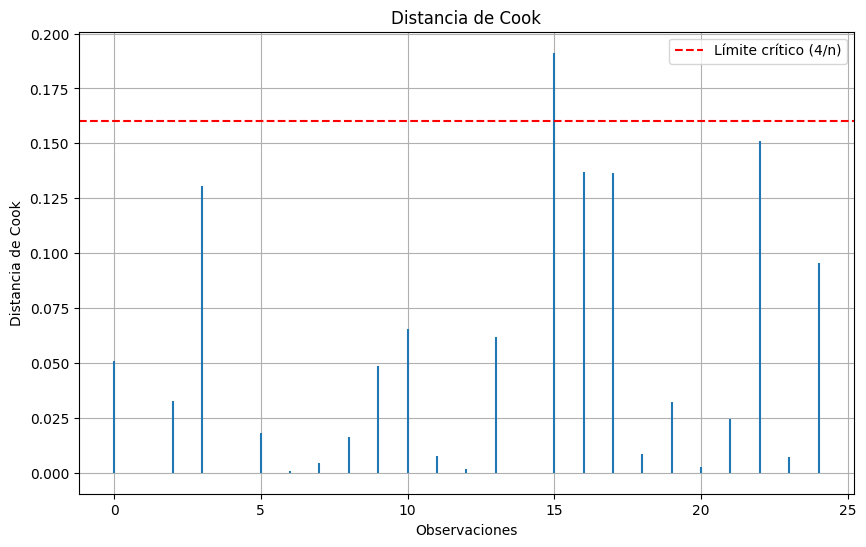

In [10]:
# Graficar la distancia de Cook
plt.figure(figsize=(10, 6))
plt.stem(range(len(cook)), cook, markerfmt=" ", basefmt=" ")
plt.title('Distancia de Cook')
plt.xlabel('Observaciones')
plt.ylabel('Distancia de Cook')
plt.axhline(y=4 / len(DatosLaboral), color='r', linestyle='--', label='Límite crítico (4/n)')
plt.legend()
plt.grid()
plt.show()

Toca preguntar por cúal nos vamos a llevar a cabo

In [11]:
punto = DatosLaboral[cook > 1 ]
punto

,Y,X1,X2,X3,X4


Punto influyente por distancia de Cook

In [49]:
puntoInfluyenteCook = DatosLaboral[cook > (4/len(DatosLaboral)) ]
puntoInfluyenteCook

,Y,X1,X2,X3,X4
15,109,109,129,102,108


Puntos de influencia con DFFITS 

In [16]:
dffits = influence.dffits[0] 
dffits

array([ 0.5209186 ,  0.01868317, -0.4122822 , -0.84599441,  0.00720604,
        0.29489758,  0.05193698, -0.14887585, -0.28440938, -0.49562674,
       -0.57988439,  0.19196352, -0.09394217, -0.55555556,  0.0103143 ,
        1.02013436,  0.86668735,  0.83988204, -0.2049741 , -0.40480881,
        0.10810883, -0.34583676,  0.89492038,  0.18245779,  0.70004227])

In [48]:
#Puntos de influencia por DFFITS

puntosInfluenciaDFFITS = DatosLaboral[np.abs(dffits) > 2 * np.sqrt(len(x) * modelo.df_model / modelo.df_resid)]
puntosInfluenciaDFFITS

,Y,X1,X2,X3,X4


Puntos de influencia por DFBETAS

In [61]:
dfbetas = modelo.get_influence().dfbetas
dfbetas

array([[ 1.03846090e-01, -1.89654055e-01,  8.92975188e-02,
         1.78583784e-01, -2.71852269e-01],
       [ 6.21753655e-03, -1.58298007e-02, -3.06549260e-03,
        -6.41366134e-03,  1.11995877e-02],
       [ 4.50910539e-02, -1.54743441e-03,  3.44850694e-02,
         1.46708413e-01, -2.65394894e-01],
       [-3.84668323e-01,  1.32048667e-01, -4.87683565e-01,
         7.12807714e-01, -4.74809458e-01],
       [ 4.26119092e-03,  4.43973124e-05,  4.52363443e-05,
        -1.49483776e-03, -1.06126004e-03],
       [ 1.44791059e-01, -1.37586543e-01, -1.56522091e-01,
         6.80544522e-02, -7.01632265e-02],
       [ 3.44692799e-02,  2.43350860e-02, -1.06842360e-02,
        -1.49326138e-02, -1.02167340e-02],
       [ 1.05739064e-01, -5.96493788e-03,  1.87400971e-03,
        -1.17573858e-01,  6.85225783e-02],
       [ 9.77488936e-02, -1.43039204e-02, -9.31483031e-02,
         7.98852132e-02, -1.45595057e-01],
       [ 1.38959992e-01, -2.12722338e-01,  3.61760207e-01,
        -2.64581090e-01

Hallamos los puntos de influencia de DFBETAS

In [65]:
puntosInfluenciaDFBETAS = np.where(np.abs(dfbetas[:, 0]) > 2 / np.sqrt(len(x)))
DatosLaboral.iloc[puntosInfluenciaDFBETAS]

,Y,X1,X2,X3,X4
10,64,87,81,90,88


Hallamos los residuales estudentizados

In [17]:
residualesEstudentizados = influence.resid_studentized_external
residualesEstudentizados

array([ 1.54762268,  0.02537838, -1.39957856, -1.7041067 ,  0.02871093,
        0.65299423,  0.06841761, -0.28928442, -0.89264909, -1.06792789,
       -1.23988648,  0.40584623, -0.14326001, -0.96896321,  0.02430965,
        1.66187532,  1.71666594,  1.30038655, -0.53086497, -1.17211344,
        0.17459249, -0.77711907,  1.48351219,  0.39198316,  1.2512583 ])

puntos influyentes de residuales estudentizados: []


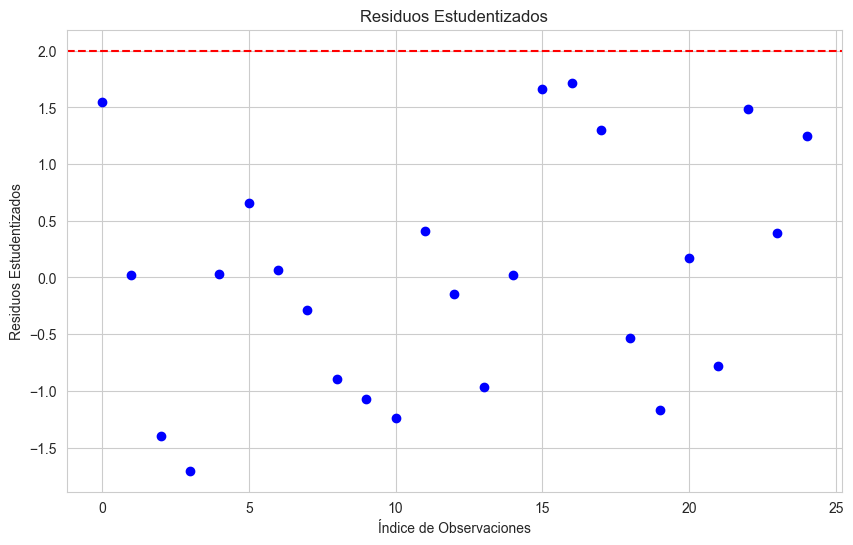

In [68]:

# Establecer un umbral
umbral = 2  # Ajusta según tu criterio

# Identificar puntos influyentes
puntosInfluyentesEstudentizados = np.where(abs(residualesEstudentizados) > umbral)[0]

# Mostrar los índices de puntos influyentes
print("puntos influyentes de residuales estudentizados:", puntosInfluyentesEstudentizados)

# Graficar los residuos estandarizados
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(DatosLaboral)), residualesEstudentizados, color='blue')
plt.axhline(y=umbral, color='red', linestyle='--')
plt.title('Residuos Estudentizados')
plt.xlabel('Índice de Observaciones')
plt.ylabel('Residuos Estudentizados')
plt.show()

Puntos de influencia por el método de leverage

In [31]:
leverage = influence.hat_matrix_diag
leverage



array([0.10176523, 0.35147801, 0.07984633, 0.19772613, 0.05926091,
       0.16940073, 0.36558643, 0.20939183, 0.09215868, 0.17721886,
       0.17947732, 0.18282289, 0.30070066, 0.24740212, 0.15255708,
       0.27368129, 0.2031176 , 0.29435811, 0.12974129, 0.10656697,
       0.27715209, 0.16530786, 0.26681045, 0.17808148, 0.23838966])

In [58]:
puntoInfluenciaLeverage = np.where(leverage > np.mean(leverage) + 2 * np.std(leverage))
observacionesInlfuenciableCook = np.where(cook > 4 / len(DatosLaboral))

#Preparar los datos para la graficación
valorx =  np.arange(len(DatosLaboral)) # Indices de las observaciones
valory = y.values   #Extraer valores de la variable dependiente

print(f"Este son mis puntos influenciables de Leverage:   \n{DatosLaboral.iloc[puntoInfluenciaLeverage]}")

print(f"Este son mis puntos influenciables de Cook: \n{DatosLaboral.iloc[observacionesInlfuenciableCook]}")




Este son mis puntos influenciables de Leverage:   
    Y   X1  X2  X3  X4
6  58  120  77  80  74
Este son mis puntos influenciables de Cook: 
      Y   X1   X2   X3   X4
15  109  109  129  102  108


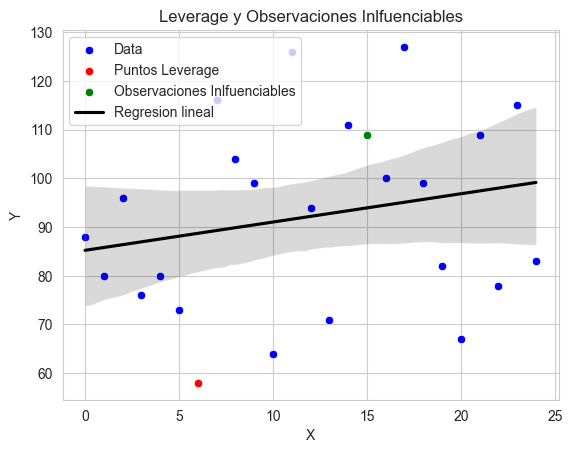

In [59]:
#Graficar
# Plot leverage and influential observations using seaborn
sns.scatterplot(x = valorx, y = valory, color='blue', label='Data')
sns.scatterplot(x= valorx[puntoInfluenciaLeverage], y=valory[puntoInfluenciaLeverage], color='red', label='Puntos Leverage')
sns.scatterplot(x=valorx[observacionesInlfuenciableCook], y= valory[observacionesInlfuenciableCook], color='green', label='Observaciones Inlfuenciables')
sns.regplot(x= valorx, y= valory, scatter=False, color='black', label='Regresion lineal')

# Add labels and title to the plot
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Leverage y Observaciones Inlfuenciables')
plt.legend()

# Show the plot
plt.show()

In [13]:
# Residuos del modelo
# ==============================================================================
residuos = modelo_final_res.resid

# prediciones de entrenamiento
# ==============================================================================
prediccion_train = modelo_final_res.predict(X_train[predictores])

NameError: name 'modelo_final_res' is not defined

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize=10)
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle='--', color='black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10)
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data     = residuos,
    stat     = "density",
    kde      = True,
    line_kws = {'linewidth': 1},
    color    = "firebrick",
    alpha    = 0.3,
    ax       = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize=10)
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)

sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize=10)
axes[1, 1].tick_params(labelsize=7)

axes[2, 0].scatter(prediccion_train, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[2, 0].axhline(y=0, linestyle='--', color='black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize=10)
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize=7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize=12)

Test de supuestos

In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos)
print(f"Test Shapiro-Wilk: estadístico = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos)
print(f"Test D'Agostino's K-squared: estadístico = {k2}, p-value = {p_value}")

In [ ]:
# Varianza Constante
# Prueba de Breusch-Pagan
# ==============================================================================
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_train[predictores])
print(f"Estadítico= {fvalue}, p-value = {f_p_value}")

In [ ]:
# Multicolinealidad (Inflación de varianza VIF)
# Correlación entre predictores numéricos
# ==============================================================================
corr_matrix = X_train[predictores].corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

In [ ]:
# Cálculo del VIF
# ==============================================================================
vif = pd.DataFrame()
vif["variables"] = X_train[predictores].columns
vif["VIF"] = [variance_inflation_factor(X_train[predictores].values, i) for i in range(X_train[predictores].shape[1])]
vif

#VIF son factores de inflación de varianza, podemos medir multicolinealidad con ellos según las reglas VIF

Predicciones

In [ ]:
# Prediciones del conjunto de test
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True).rename(columns={'const':'intercept'})
modelo_final_res.predict(X_test[predictores])

In [ ]:
# Predicciones con intervalo de confianza
# ==============================================================================
# La columna mean contiene la media de la predicción
predicciones = modelo_final_res.get_prediction(exog = X_test[predictores]).summary_frame(alpha=0.05)
predicciones

In [ ]:
# Error de test del modelo
# ==============================================================================
error = rmse(y_test.flatten(), predicciones['mean'])
print(f"El error (rmse) de test es: {error}")

In [ ]:
# Correlación lineal entre variables numéricas
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

3 - Analice si hay una relación lineal entre las variables inversión en Marketing y ventas, mediante una regresión lineal con todos sus repectivos componentes.

Formula Utilizada:

y = β0+β1 * x

x= variable independiente

y= dependiente ventas

β0= intercepto

β1=pendiente midiendo el cambio en y




In [7]:
x=sm.add_constant(x) # Añadimos la constante

modelo_lineal=sm.OLS(y,x).fit() # Ajustamos el modelo
resumen_modelo=modelo_lineal.summary() # Resumen del modelo
#print(resumen_modelo)


In [ ]:


intercepcion=modelo_lineal.params.iloc[0] # Valor de la intercepción
pendiente=modelo_lineal.params.iloc[1] # Valor de la pendiente
coeficiente_determinacion=modelo_lineal.rsquared # Coeficiente de determinación
valor_p=modelo_lineal.pvalues.iloc[1]  # Valor p para la pendiente



print(f'Intercepción (β0): {intercepcion}')
print(f'Pendiente (β1): {pendiente}')
print(f'Coeficiente de determinación (R²): {coeficiente_determinacion}')
print(f'Valor p para la pendiente: {valor_p}')
print(resumen_modelo)




In [ ]:
predicion_ventas= modelo_lineal.predict(x) # Predicción de ventas
# Graficar la línea de regresión con los datos reales
plt.figure(figsize=(8, 6))

# Gráfico de dispersión de las ventas reales vs inversión
plt.scatter(DatosMd['Inversión en marketing digital'], DatosMd['Venta'], color='green', label='Datos')

# Graficar la línea de regresión
plt.plot(DatosMd['Inversión en marketing digital'], predicion_ventas, color='red', label='Regresión Lineal')

# Añadir etiquetas y título
plt.title('Regresión Lineal: Inversión en Marketing vs Ventas')
plt.xlabel('Inversión en Marketing Digital (COP)')
plt.ylabel('Ventas (COP)')
plt.legend()
plt.grid(True)

En conclusion podriamos indicar que existe una relación medianamente positiva y significativa entre la inversión en marketing digital y las ventas.La línea roja muestra cómo se predicen las ventas en función de la inversión en marketing (datos en verde), observando el valor de la pendiente nos confirma la realacion entre estas variables.

Otro punto importante analizar es el coeficiente de determinacion que esta en un 0.5580 de la variablidad en ventas puede explicarse por la inversion en marketing.

### Validando los supuestos del modelo de regresion lineal

### Aleatoriedad

In [ ]:
# Calculo de error (residuales)

residuales= y - predicion_ventas# calculo de residuales
print(residuales)
print(f'Promedio de residuales: {residuales.mean()}')

In [ ]:
#Aleatoriedad

plt.figure(figsize=(8, 6))
plt.plot(x.iloc[:,1], residuales, color='blue', linestyle='-', marker='o')
plt.axhline(y=0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.title('Gráfico de Residuos: Valores Predichos vs Residuos (Línea)')
plt.xlabel('Orden de ejecución')
plt.ylabel('Residuos')
plt.grid(True)
plt.legend()



Dado que no se logra observar un patrón de comportamiento dentro de la gráfica de residuales, se puede concluir gráficamente que los residuos presentan una aleatoriedad para cumplir con el supuesto de aleatoriedad.

### Normalidad

In [ ]:
#Se uso el supuesto de normalidad mediante el test de Shapiro
shapiro(residuales)

Dado que el test de Shapiro en los residuales muestra un valor p < alpha bajo la evidencia estadistica, se puede concluir que las variables no se distribuyen de una forma normal bajo un 95% de confianza

### Linealidad

In [ ]:
# Linealidad 

plt.figure(figsize=(8, 6))
plt.scatter(predicion_ventas, residuales, color='blue', linestyle='-', marker='o')
plt.axhline(y=0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.title('Gráfico de Residuos: Valores Predichos vs Residuos (Línea)')
plt.xlabel('Predicción')
plt.ylabel('Residuos')
plt.grid(True)
plt.legend()

Adicionalmente, como la gráfica no presenta un comportamiento circular y los valores en mayor proporción se encuentran entre los residuos de 1 y -1 podemos concluir gráficamente que los residuos presentan linealidad para cumplir con el supuesto de linealidad.

### Varianza

In [ ]:
# Para confirmar si la varianza es constante usamos el test númerico de Levene como:

# H0: La varianza es constante
# Ha: La varianza no es constante

levene(residuales, predicion_ventas)

Como valor p del test númerico de Levene < alpha = 0.05 según la evidencia estadistica, rechazamos H0 a favor de la alternativa, por ello se puede concluir que la varianza no es constante con un 95% de confianza

### Conclusión
Se observa una relación positiva inicial entre la inversión en marketing y las ventas, lo que sugiere un vínculo directo. Sin embargo, el modelo podría estar dejando de lado componentes no lineales. El coeficiente de determinación (R²) revela que una parte significativa de la variabilidad en las ventas no está completamente explicada solo por la inversión en marketing. Al validar los supuestos de la regresión lineal, se concluye que, aunque existe una correlación moderada de 0.5580 entre las variables, no es apropiado modelarlas a través de una regresión lineal. Esto se debe a que, aunque se cumple el supuesto de aleatoriedad y linealidad, se violan los supuestos de normalidad y homocedasticidad (varianza constante), lo que genera que el coeficiente de regresión se vea afectado mostrando la linealidad moderada.